# Tugas Besar - IF2220 - Probabilitas dan Statistika
## Penarikan Kesimpulan dan Pengujian Hipotesis

### Soal Tugas

Diberikan sebuah data water_potability.csv yang dapat diakses pada utas berikut: Dataset
Tugas Besar IF2220. water_potability.csv merupakan data metrik kualitas air yang
mengandung 11 kolom sebagai berikut:
1. id
2. pH
3. Hardness
4. Solids
5. Chloramines
6. Sulfate
7. Conductivity
8. OrganicCarbon
9. Trihalomethanes
10. Turbidity
11. Potability

Kolom 2-10 adalah kolom atribut (non-target), sedangkan kolom 11 adalah kolom target.
Anda diminta untuk melakukan analisis statistika sebagai berikut: (Untuk nomor 4 dan 5, dipastikan data yang diberikan sudah merupakan sampel)

In [146]:
# Markdown dan display untuk menulis di notebook
from IPython.display import Markdown, display
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Import data
nama_kolom = ['id','pH','Hardness','Solids','Chloramines','Sulfate','Conductivity','OrganicCarbon','Trihalomethanes','Turbidity','Potability']
wp = pd.read_csv("water_potability.csv", names = nama_kolom)
display(wp)

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,8.197353,203.105091,27701.794055,6.472914,328.886838,444.612724,14.250875,62.906205,3.361833,1
2006,2007,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,2008,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,2009,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1


### **1. Menulis deskripsi statistika (Descriptive Statistics)**
Untuk semua kolom pada data yang bersifat numerik, terdiri dari:
- mean 
- median 
- modus 
- standar deviasi 
- variansi
- range
- nilai minimum 
- nilai maksimum 
- kuartil 
- IQR
- skewness
- kurtosis

In [147]:
wp_noid = wp.drop(['id'], axis=1)
wp_stats = pd.DataFrame(columns = nama_kolom)

def concate_df(df_stats : pd.DataFrame, desc_stat) -> pd.DataFrame:
    if (isinstance(desc_stat, tuple)):
        return pd.concat([df_stats, desc_stat[0].to_frame(name = desc_stat[1]).T])
    else:
        return pd.concat([df_stats, desc_stat])

wp_stats = concate_df(wp_stats, (wp.mean(), "mean"))
wp_stats = concate_df(wp_stats, (wp.median(), "median"))
wp_stats = concate_df(wp_stats, (wp.std(), "std deviasi"))

range_stat = wp.describe().loc["max"] - wp.describe().loc["min"]
wp_stats = concate_df(wp_stats, (range_stat, "range"))

wp_stats = concate_df(wp_stats, (wp.min(), "min"))
wp_stats = concate_df(wp_stats, (wp.max(), "maks"))

quartile_stat = wp.describe().loc[["25%", "50%", "75%"]]
wp_stats = concate_df(wp_stats, quartile_stat)

IQR_stat = wp_stats.loc["75%"] - wp_stats.loc["25%"]
wp_stats = concate_df(wp_stats, (IQR_stat, "IQR"))

wp_stats = concate_df(wp_stats, (wp.skew(), "skewness"))
wp_stats = concate_df(wp_stats, (wp.kurt(), "kurtosis"))

display(wp_stats.head(13))

wp_mode_stat = wp.mode()
wp_mode_stat.index.name = "modus"
display(wp_mode_stat)

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
mean,1005.5,7.087193,195.969209,21904.673439,7.134322,333.211376,426.476708,14.35794,66.400717,3.969497,0.402985
median,1005.5,7.02949,197.203525,20926.882155,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.0
std deviasi,580.38134,1.572803,32.643166,8625.397911,1.585214,41.211111,80.701872,3.32577,16.081109,0.780471,0.49062
range,2009.0,13.772501,243.84589,56167.729801,11.736129,352.030642,551.722883,24.806707,115.422987,5.044749,1.0
min,1.0,0.227499,73.492234,320.942611,1.390871,129.0,201.619737,2.2,8.577013,1.45,0.0
maks,2010.0,14.0,317.338124,56488.672413,13.127,481.030642,753.34262,27.006707,124.0,6.494749,1.0
25%,503.25,6.090785,176.740657,15614.412962,6.138326,307.626986,366.619219,12.12253,55.949993,3.442882,0.0
50%,1005.5,7.02949,197.203525,20926.882155,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.0
75%,1507.75,8.053006,216.447589,27170.534649,8.109933,359.268147,482.209772,16.683562,77.294613,4.514663,1.0
IQR,1004.5,1.962221,39.706932,11556.121687,1.971607,51.641161,115.590553,4.561031,21.34462,1.071781,1.0


,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
modus,,,,,,,,,,,
0,1,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.0
1,2,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207,NaN
2,3,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101,NaN
3,4,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554,NaN
4,5,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,11.568768,286.567991,50793.898917,12.580026,458.441072,666.690618,23.569645,114.034946,6.307678,NaN
2006,2007,11.898078,287.975540,53735.899194,12.626900,460.107069,669.725086,23.604298,114.208671,6.357439,NaN
2007,2008,12.246928,300.292476,55334.702799,12.653362,475.737460,695.369528,23.917601,116.161622,6.389161,NaN


### **2. Membuat Visualisasi plot distribusi** 
Visualisasi dibuat dalam bentuk histogram dan boxplot untuk setiap kolom numerik beserta penjelasannya.

In [148]:
def box_hist_plot(col_data):
    fig, (ax_box, ax_hist) = plt.subplots(  nrows = 2,
                                            figsize = (14,10),
                                            sharex = True,
                                            gridspec_kw = {"height_ratios": (.15, .85)})
    sns.set(style = "ticks")

    sns.boxplot(x = col_data, ax = ax_box)
    sns.histplot(x = col_data, kde = True, ax = ax_hist)

    ax_box.set(yticks = [])
    sns.despine(ax = ax_hist)
    sns.despine(ax = ax_box, left = True)

    plt.show()

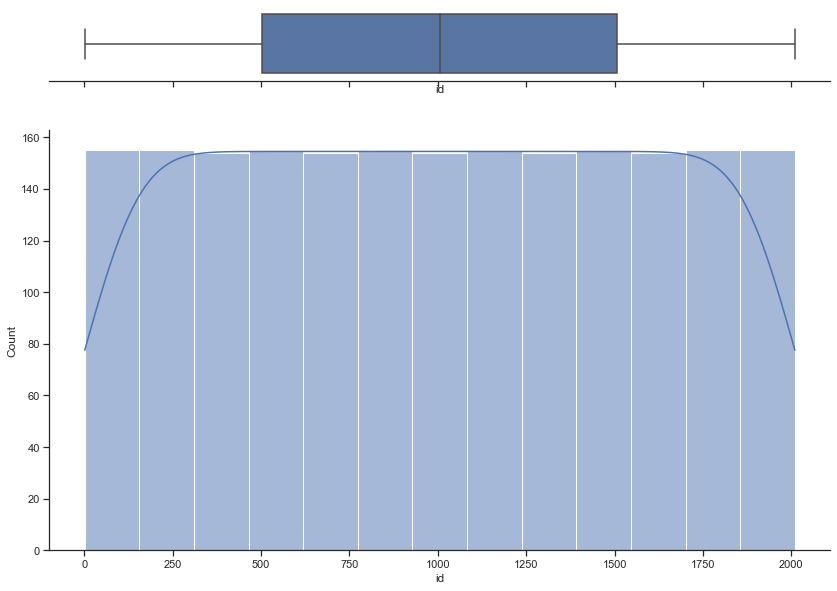

In [149]:
box_hist_plot(wp[nama_kolom[0]])

**id**

Berdasarkan visualisasi kedua plot id di atas, terlihat bahwa data id terdistribusi normal dengan keruncingan yang relatif sangat landai. Perlu diperhatikan bawah data ini merupakan index dataset water_potability dan nilainya unik.

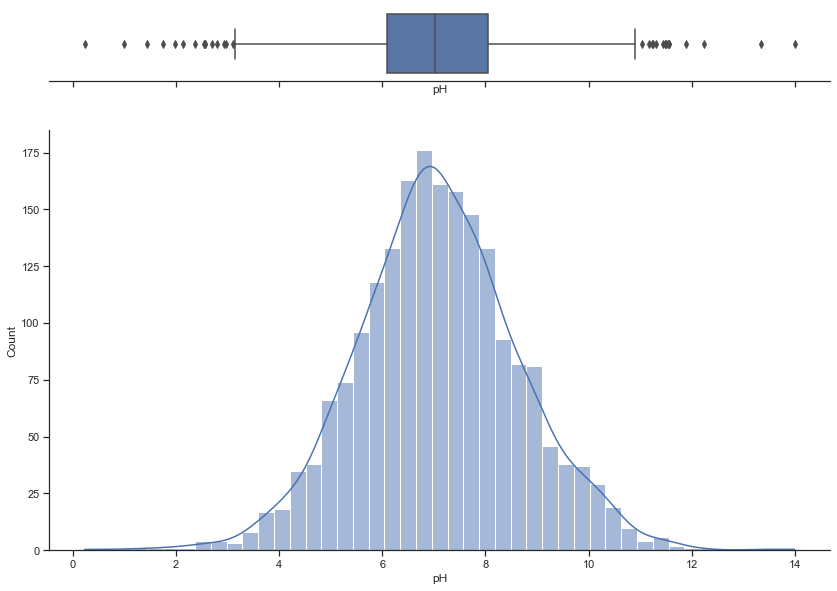

In [150]:
box_hist_plot(wp[nama_kolom[1]])

**pH**

Berdasarkan kedua grafik pH di atas, terlihat bahwa data relatif mendekati terdistribusi normal, dengan nilai median pH dan modus porsiran pH yang relatif hampir sama. Terlihat juga bahwa data tervisualisasi relatif agak runcing. Selain itu, terdapat *outliers* atas dan bawah.

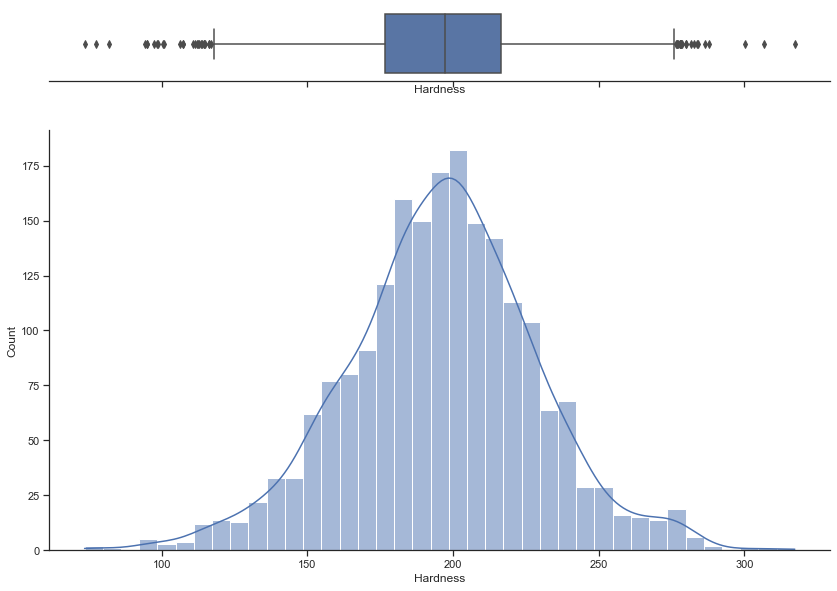

In [151]:
box_hist_plot(wp[nama_kolom[2]])

***Hardness***

Seperti pada data pH, terlihat bahwa persebaran data *hardness* relatif mendekati terdistribusi normal. Namun, data *hardness* terlihat lebih tidak runcing dibandingkan data pH. Data *hardness* memiliki *outliers* atas dan bawah yang tampak lebih banyak dibandingkan data pH.

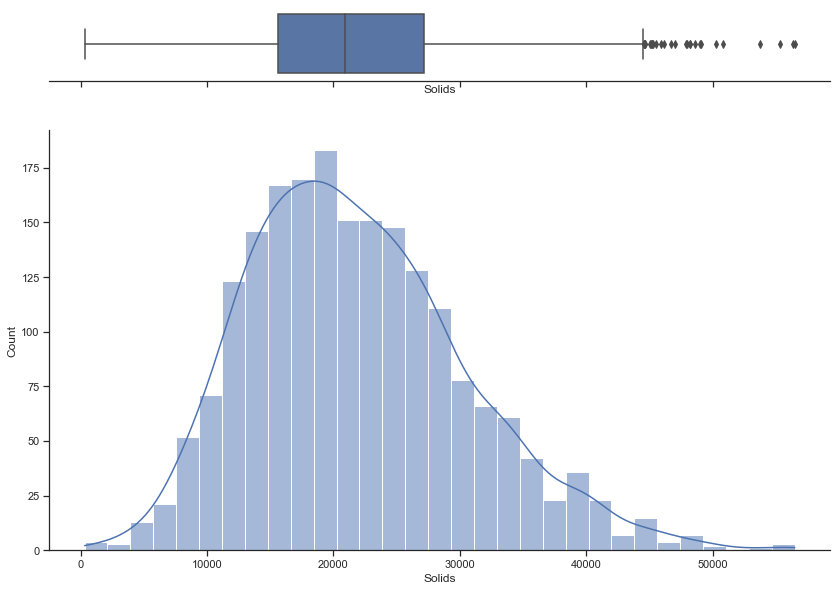

In [152]:
box_hist_plot(wp[nama_kolom[3]])

***Solids***

Berdasarkan kedua grafik *solids* di atas, terlihat bahwa data *positivelyy skewed*, yakni persebaran data yang cenderung lebih banyak di nilai *solids* yang lebih kecil. Terlihat juga bahwa nilai porsiran modus data lebih kecil dibandingkan nilai median data. Median data atau nilai Q2 juga tampak lebih dekat dengan nilai Q1 dan elemen "minimum" dibandingkan dengan nilai Q3 dan elemen "maksimum". Selain itu, terlihat bahwa nilai *outliers* atas yang relatif banyak dan tidak ada nilai *outliers* bawah. Jika dibandingkan dengan data *hardness*, visualisasi data *solids* tampak relatif lebih landai.

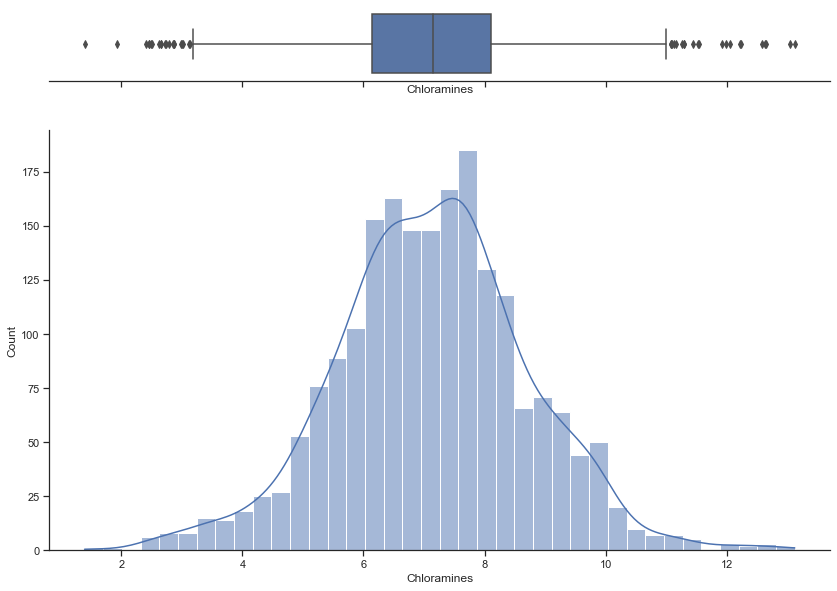

In [153]:
box_hist_plot(wp[nama_kolom[4]])

***Chloramines***

Berdasarkan kedua grafik *chloramines* di atas, terlihat bahwa persebaran data relatif mendekati terdistribusi normal atau simetris. Terlihat bahwa nilai porsiran modus data relatif sedikit lebih besar dibandingkan nilai median data. Median data atau nilai Q2 juga relatif tampak simetris terhadap nilai Q1 & elemen "minimum" dan nilai Q3 & elemen "maksimum". Selain itu, terlihat bahwa terdapat *outliers* atas dan bawah. Visualisasi persebaran data terlihat relatif agak runcing.

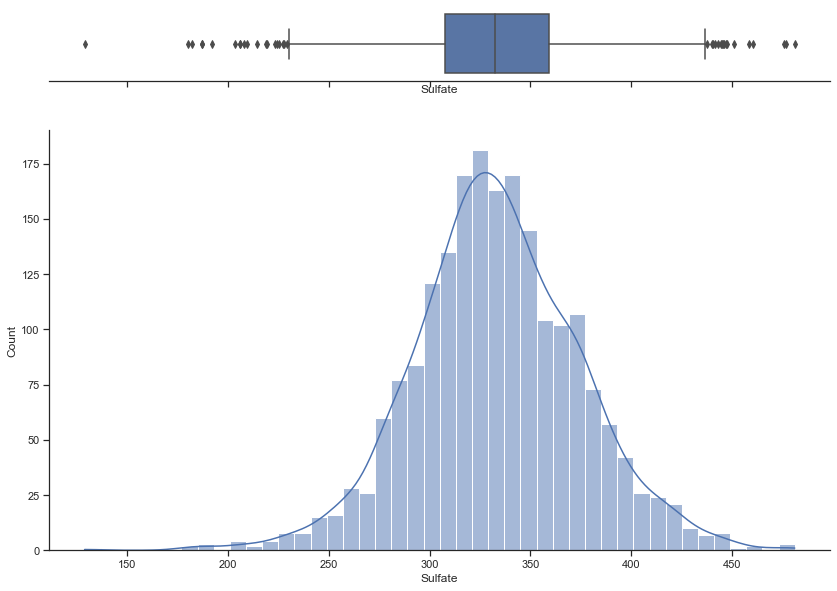

In [154]:
box_hist_plot(wp[nama_kolom[5]])

***Sulfate***

Berdasarkan kedua grafik *sulfate* di atas, terlihat bahwa persebaran data relatif mendekati terdistribusi normal atau simetris. Terlihat bahwa nilai porsiran modus data relatif sedikit lebih kecil dibandingkan nilai median data. Median data atau nilai Q2 relatif sedikit lebih mendekati nilai Q1 & elemen "minimum" dibandingkan nilai Q3 & elemen "maksimum". Visualisasi persebaran data terlihat relatif lebih berada pada nilai *sulfate* yang lebih tinggi, salah satunya disebabkan terdapat *outliers* bawah yang nilainya relatif jauh lebih kecil dari elemen "minimum" boxplot dan *outliers* bawah lainnya. Visualisasi persebaran data juga terlihat relatif lebih runcing dibandingkan data *chloramines*.

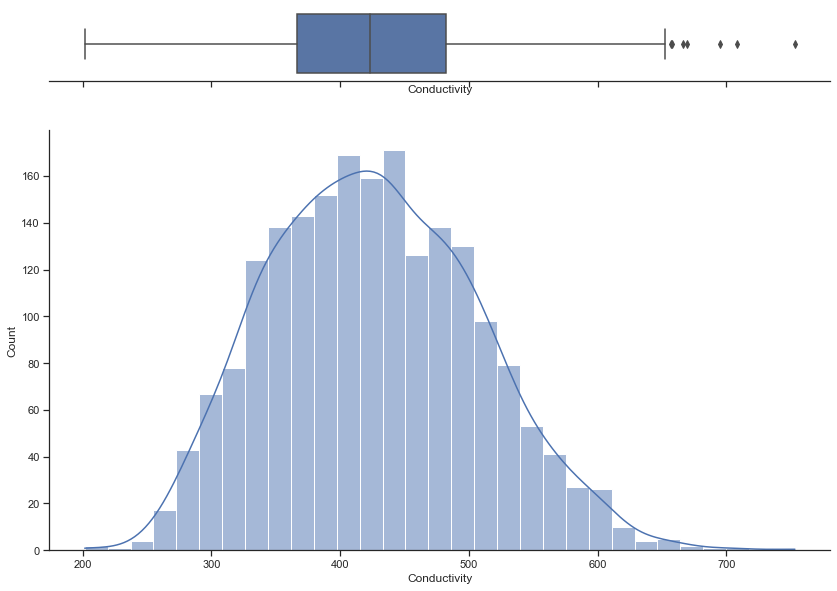

In [155]:
box_hist_plot(wp[nama_kolom[6]])

***Conductivity***

Berdasarkan kedua grafik *conductivity* di atas, terlihat bahwa persebaran data relatif cukup mendekati terdistribusi normal atau simetris. Terlihat bahwa nilai porsiran modus data relatif sedikit lebih besar dibandingkan nilai median data. Namun, perlu diperhatikan bahwa terdapat satu porsiran data yang jumlahnya relatif hampir sama dengan nilai modus tersebut dan nilainya relatif sedikit lebih kecil dibandingkan median data. Terhadap nilai Q1 dan Q3, nilai median atau Q2 relatif hampir simetris. Pun, selisih nilai elemen "minimum" boxplot dan Q1 terhadap selisih nilai elemen "maksimum" boxplot dan Q3 tampak relatif hampir mirip. Visualisasi persebaran data terlihat relatif lebih berada pada nilai *conductivity* yang lebih kecil, salah satunya disebabkan terdapat beberapa *outliers* atas, tetapi tidak terdapat nilai *outliers* bawah. Visualisasi persebaran data juga terlihat relatif cukup landai.

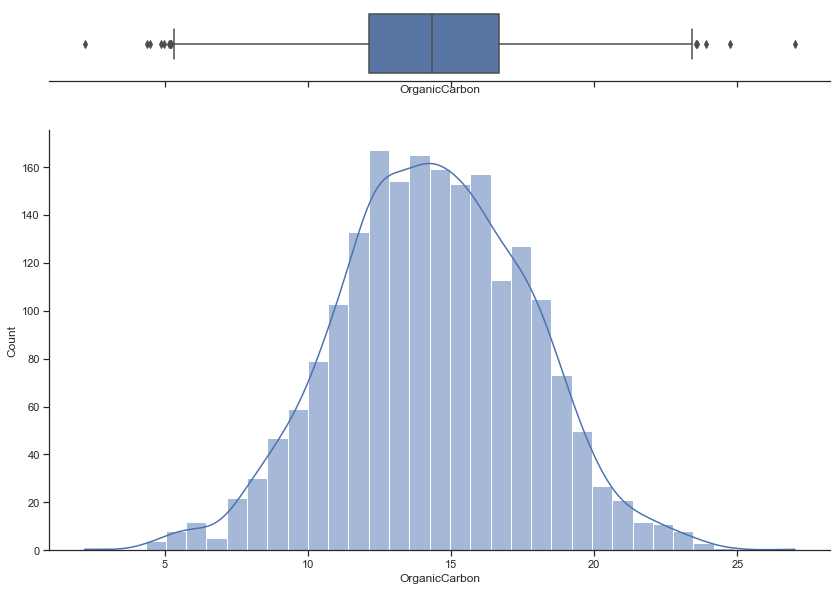

In [156]:
box_hist_plot(wp[nama_kolom[7]])

***OrganicCarbon***

Berdasarkan kedua grafik *OrganicCarbon* di atas, terlihat bahwa persebaran data relatif cukup mendekati terdistribusi normal atau simetris. Terlihat bahwa nilai porsiran modus data lebih kecil dibandingkan nilai median data. Namun, perlu diperhatikan bahwa nilai-nilai porsiran data yang jumlahnya relatif hampir sama dengan nilai modus, seluruhnya relatif mendekati median dan nilainya lebih besar daripada nilai modus. Terhadap nilai Q1 dan Q3, nilai median atau Q2 relatif hampir simetris. Pun, selisih nilai elemen "minimum" boxplot dan Q1 terhadap selisih nilai elemen "maksimum" boxplot dan Q3 tampak relatif hampir sama. Terdapat *outliers* bawah dan atas. Baik *outliers* bawah maupun atas, terdapat *outlier* yang nilainya relatif cukup jauh terhadap nilai *outliers* lainnya (pada kelompoknya) dan juga terhadap nilai elemen "minimum" atau "maksimum" boxplot. Visualisasi persebaran data terlihat relatif sedang, yaitu tidak terlalu runcing dan tidak terlalu landai.

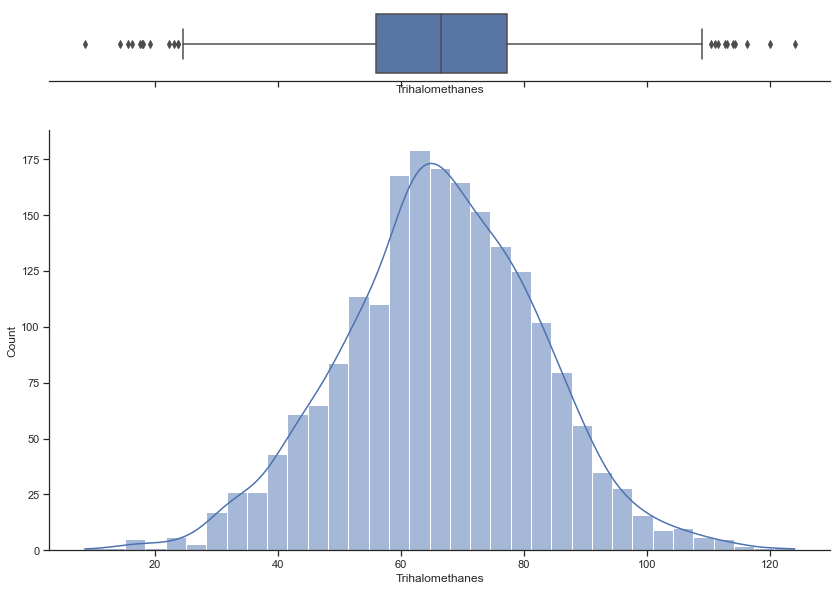

In [157]:
box_hist_plot(wp[nama_kolom[8]])

***Trihalomethanes***

Berdasarkan kedua grafik *trihalomethanes* di atas, terlihat bahwa persebaran data relatif cukup mendekati terdistribusi normal atau simetris. Terlihat bahwa nilai porsiran modus data relatif sedikit lebih kecil dibandingkan nilai median data. Terhadap nilai Q1 dan Q3, nilai median atau Q2 relatif hampir simetris. Pun, selisih nilai elemen "minimum" boxplot dan Q1 terhadap selisih nilai elemen "maksimum" boxplot dan Q3 tampak relatif hampir sama. Terdapat *outliers* bawah dan atas. Visualisasi persebaran data terlihat relatif cukup runcing.

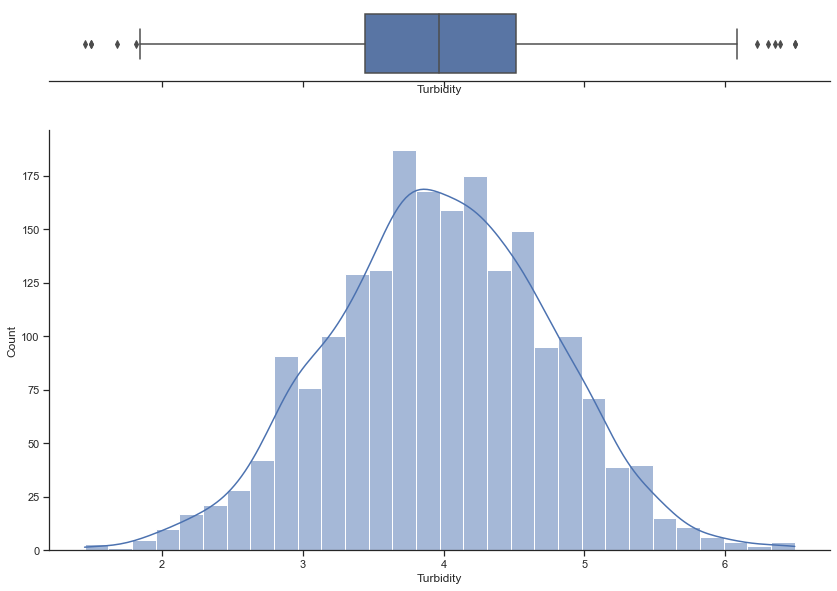

In [158]:
box_hist_plot(wp[nama_kolom[9]])

***Turbidity***

Berdasarkan kedua grafik *turbidity* di atas, terlihat bahwa persebaran data relatif mendekati terdistribusi normal atau simetris. Terlihat bahwa nilai porsiran modus data relatif lebih kecil dibandingkan nilai median data. Namun, terdapat beberapa nilai yang banyaknya relatif mirip dengan nilai modus data dan nilai tersebut lebih besar dibandingkan nilai modus data. Terhadap nilai Q1 dan Q3, nilai median atau Q2 relatif hampir simetris. Pun, selisih nilai elemen "minimum" boxplot dan Q1 terhadap selisih nilai elemen "maksimum" boxplot dan Q3 tampak relatif hampir sama. Terdapat relatif sedikit *outliers* bawah dan atas. Visualisasi persebaran data terlihat relatif cukup landai.

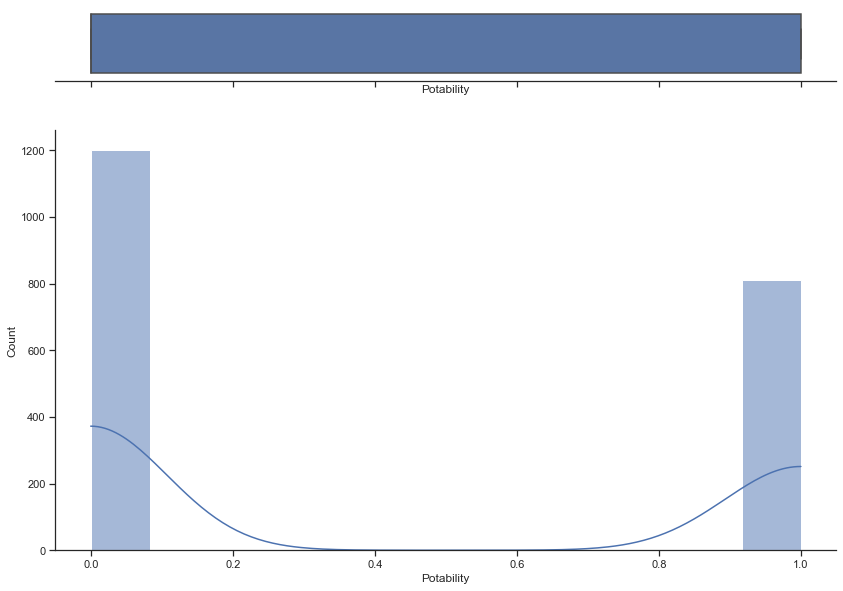

In [159]:
box_hist_plot(wp[nama_kolom[10]])

***Potability***

Berdasarkan kedua grafik *potability* di atas, dapat dilihat bahwa data *potability* hanya bernilai 0 atau 1. Terlihat juga bahwa data *potability* memiliki nilai modus dan median nol. Karena nilai 0 yang dapat dipastikan lebih banyak dibandingkan nilai 1, distribusi data relatif sedikit *positively skewed*.

### **3. Menentukan setiap kolom numerik berdistribusi normal atau tidak**

*Normality test* dilakukan untuk seluruh kolom, kecuali id dan Potability. *Normality test* dilakukan dengan meninjau histogram plot yang sudah ditampilkan di atas. 
- pH berdistribusi **normal**
- Hardness berdistribusi **normal**
- Solids **tidak** berdistribusi **normal**
- Chloramines berdistribusi **normal**
- Sulfate **tidak** berdistribusi **normal**
- Conductivity **tidak** berdistribusi **normal**
- OrganicCarbon berdistribusi **normal**
- Trihalomethanes berdistribusi **normal**
- Turbidity berdistribusi **normal**

Normality test juga dilakukan dengan menggunakan library `scipy.stats.normaltest()` untuk masing-masing kolom, dengan alpha = 0.05. Hasilnya ditampilkan di bawah.

In [160]:
for i in nama_kolom:
    if(i != "id" and i != "Potability"):
        k2, pvalue = st.normaltest(wp[i])
        # bandingkan pvalue dengan alpha = 0.05
        if (pvalue < 0.05):
            print("Kolom '" + i + "' tidak terdistribusi normal")
        else:
            print("Kolom '" + i + "' terdistribusi normal")

Kolom 'pH' tidak terdistribusi normal
Kolom 'Hardness' tidak terdistribusi normal
Kolom 'Solids' tidak terdistribusi normal
Kolom 'Chloramines' tidak terdistribusi normal
Kolom 'Sulfate' tidak terdistribusi normal
Kolom 'Conductivity' tidak terdistribusi normal
Kolom 'OrganicCarbon' terdistribusi normal
Kolom 'Trihalomethanes' terdistribusi normal
Kolom 'Turbidity' terdistribusi normal


### **4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing** 
Boxplot juga ditampilkan untuk kolom/bagian yang bersesuaian.

In [161]:
# definisi fungsi
def calc_mean_z(data_mean, hyp_mean, data_std, tot_data):
    return (data_mean - hyp_mean) * (tot_data**(0.5))/data_std

def calc_bin_z(real_prop, obs_prop, n_data):
    return (real_prop - obs_prop)/(obs_prop*(1-obs_prop)/n_data)**0.5

#### 4a. Nilai Rata-rata pH di atas 7?

**1. Menentukan hipotesis nol**

- $H_{0}: \mu_{pH} = 7$



**2. Pilih hipotesis alternatif**

Dengan menerapkan **one-tailed test** maka $H_{1}$ akan ditentukan sebagai berikut.

- $H_{1}: \mu_{pH} > 7$



**3. Menentukan tingkat signifikan $\alpha$**

- $\alpha = 0.05$



**4. Menentukan uji statistik dan daerah kritis**

Dengan menguji terhadap **distribusi normal $Z$**, didapat daerah kritis sebagai berikut.

- $z > z_{0.05} = 1.6448536269514722$



**5. Menghitung nilai uji statistik**

- $z = \frac{\bar{x} - \mu_{0}}{\sigma/\sqrt{n}}\\z = 2.485445147379887$

Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di daerah kritis, yaitu

- $z = 2.485445147379887 > z_{0.05} = 1.6448536269514722$

maka $H_{0}$ ditolak



**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**

- $P(Z > 2.485445147379887) = 0.006469476288896462$

Dengan turut mengevaluasi terhadap nilai-$P$, yaitu

- $P(Z > 2.485445147379887) = 0.006469476288896462 < \alpha = 0.05$

maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni nilai rata-rata pH adalah di atas 7

<AxesSubplot:>

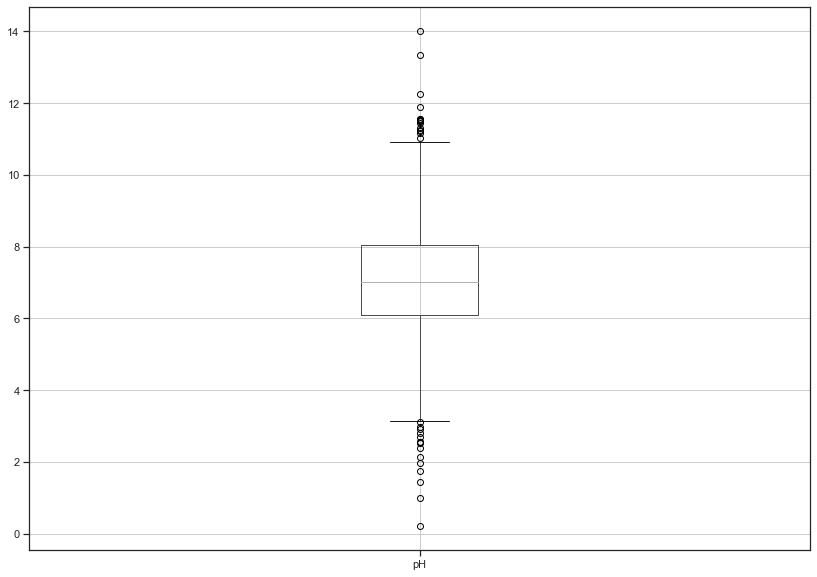

In [162]:
display(Markdown(
                    "**1. Menentukan hipotesis nol**\n\n"

                    "- $"
                    "H_{0}: \\mu_{pH} = 7"
                    "$\n\n"
                ))

display(Markdown(   
                    "**2. Pilih hipotesis alternatif**\n\n"

                    "Dengan menerapkan **one-tailed test** maka $H_{1}$ akan ditentukan sebagai berikut.\n\n"

                    "- $"
                    "H_{1}: \\mu_{pH} > 7"
                    "$\n\n"
                ))


display(Markdown(   
                    "**3. Menentukan tingkat signifikan $\\alpha$**\n\n"

                    "- $"
                    "\\alpha = 0.05"
                    "$\n\n"
                ))

z_alpha = st.norm.ppf(1-.05)
display(Markdown(   
                    "**4. Menentukan uji statistik dan daerah kritis**\n\n"

                    "Dengan menguji terhadap **distribusi normal $Z$**, didapat daerah kritis sebagai berikut.\n\n"

                    "- $"
                    "z > z_{0.05} = " + str(z_alpha) + 
                    "$\n\n"
                ))

z_val = calc_mean_z(wp["pH"].mean(), 7, wp["pH"].std(), len(wp))
display(Markdown(   
                    "**5. Menghitung nilai uji statistik**\n\n"

                    "- $"
                    "z = \\frac{\\bar{x} - \\mu_{0}}{\\sigma/\\sqrt{n}}\\\\"
                    "z = " + str(z_val) +
                    "$\n\n"

                    "Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di daerah kritis, yaitu\n\n"
                    "- $"
                    "z = " + str(z_val) + " > z_{0.05} = " + str(z_alpha) +
                    "$\n\n" 
                    
                    "maka $H_{0}$ ditolak\n\n"
                ))

p_val = st.norm.sf(abs(z_val))
display(Markdown(
                    "**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**\n\n"

                    "- $"
                    "P(Z > " + str(z_val) +") = " + str(p_val) +
                    "$\n\n"

                    "Dengan turut mengevaluasi terhadap nilai-$P$, yaitu\n\n"
                    "- $"
                    "P(Z > " + str(z_val) +") = " + str(p_val) + " < \\alpha = 0.05"
                    "$\n\n" 
                    
                    "maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni nilai rata-rata pH adalah di atas 7"
                ))

wp.boxplot(["pH"], figsize=(14,10))

#### 4b. Nilai Rata-rata Hardness tidak sama dengan 205?

**1. Menentukan hipotesis nol**

- $H_{0}: \mu_{hardness} = 205$



**2. Pilih hipotesis alternatif**

Dengan menerapkan **two-tailed test** maka $H_{1}$ akan ditentukan sebagai berikut.

- $H_{1}: \mu_{hardness} \neq 205$



**3. Menentukan tingkat signifikan $\alpha$**

- $\alpha = 0.05$



**4. Menentukan uji statistik dan daerah kritis**

Dengan menguji terhadap **distribusi normal $Z$**, didapat daerah-daerah kritis sebagai berikut.

- $z > z_{0.025} = 1.959963984540054\\z < -z_{0.025} = -1.959963984540054$



**5. Menghitung nilai uji statistik**

- $z = \frac{\bar{x} - \mu_{0}}{\sigma/\sqrt{n}}\\z = -12.403137170010732$

Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di salah satu daerah kritis, yaitu

- $z = -12.403137170010732 < -z_{0.025} = -1.959963984540054$

maka $H_{0}$ ditolak



**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**

- $P(Z < 12.403137170010732) = 1.2564452447572327e-35$

Dengan turut mengevaluasi terhadap nilai-$P$, yaitu

- $P(|Z| > 12.403137170010732) = 2P(Z < -12.403137170010732) \approx 2.5128904895144654e-35 < \alpha = 0.05$

maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni nilai rata-rata Hardness tidak sama dengan 205

<AxesSubplot:>

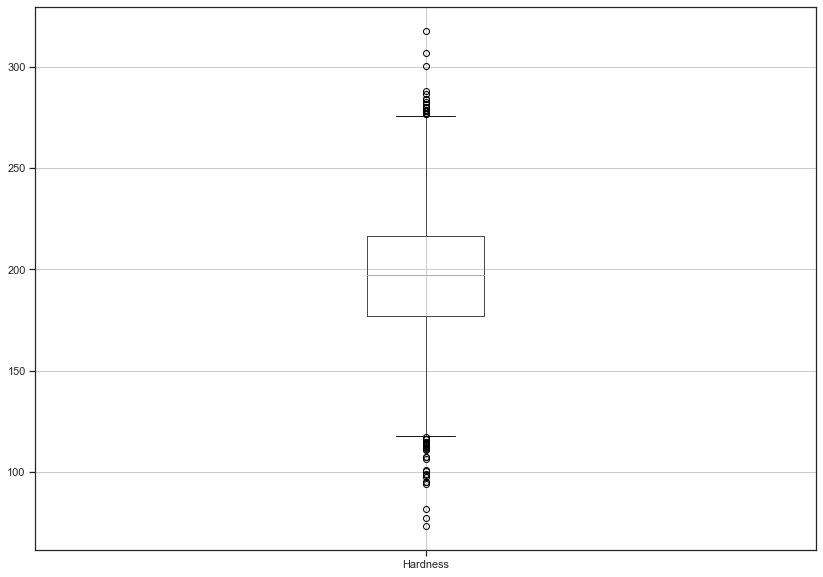

In [163]:
display(Markdown(
                    "**1. Menentukan hipotesis nol**\n\n"

                    "- $"
                    "H_{0}: \\mu_{hardness} = 205"
                    "$\n\n"
                ))

display(Markdown(   
                    "**2. Pilih hipotesis alternatif**\n\n"

                    "Dengan menerapkan **two-tailed test** maka $H_{1}$ akan ditentukan sebagai berikut.\n\n"

                    "- $"
                    "H_{1}: \\mu_{hardness} \\neq 205"
                    "$\n\n"
                ))


display(Markdown(   
                    "**3. Menentukan tingkat signifikan $\\alpha$**\n\n"

                    "- $"
                    "\\alpha = 0.05"
                    "$\n\n"
                ))

z_alpha = st.norm.ppf(1-.025)
display(Markdown(   
                    "**4. Menentukan uji statistik dan daerah kritis**\n\n"

                    "Dengan menguji terhadap **distribusi normal $Z$**, didapat daerah-daerah kritis sebagai berikut.\n\n"

                    "- $"
                    "z > z_{0.025} = " + str(z_alpha) + "\\\\"
                    "z < -z_{0.025} = " + str(-z_alpha) + 
                    "$\n\n"
                ))

z_val = calc_mean_z(wp["Hardness"].mean(), 205, wp["Hardness"].std(), len(wp))
display(Markdown(   
                    "**5. Menghitung nilai uji statistik**\n\n"

                    "- $"
                    "z = \\frac{\\bar{x} - \\mu_{0}}{\\sigma/\\sqrt{n}}\\\\"
                    "z = " + str(z_val) +
                    "$\n\n"

                    "Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di salah satu daerah kritis, yaitu\n\n"
                    "- $"
                    "z = " + str(z_val) + " < -z_{0.025} = " + str(-z_alpha) +
                    "$\n\n" 
                    
                    "maka $H_{0}$ ditolak\n\n"
                ))

p_val = st.norm.sf(abs(z_val))
display(Markdown(
                    "**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**\n\n"

                    "- $"
                    "P(Z < " + str(-z_val) +") = " + str(p_val) +
                    "$\n\n"

                    "Dengan turut mengevaluasi terhadap nilai-$P$, yaitu\n\n"
                    "- $"
                    "P(|Z| > "+str(abs(z_val))+") = 2P(Z < "+str(z_val)+") \\approx "+str(p_val*2)+" < \\alpha = 0.05"
                    "$\n\n" 
                    
                    "maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni nilai rata-rata Hardness tidak sama dengan 205"
                ))

wp.boxplot(["Hardness"], figsize=(14,10))

#### 4c. Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

**1. Menentukan hipotesis nol**

- $H_{0}: \mu_{Solids_{1,100}} = 21900$



**2. Pilih hipotesis alternatif**

Dengan menerapkan **two-tailed test** maka $H_{1}$ akan ditentukan sebagai berikut.

- $H_{1}: \mu_{Solids_{1,100}} \neq 21900$



**3. Menentukan tingkat signifikan $\alpha$**

- $\alpha = 0.05$



**4. Menentukan uji statistik dan daerah kritis**

Dengan menguji terhadap **distribusi normal $z$**, didapat daerah-daerah kritis sebagai berikut.

- $z > z_{0.025} = 1.959963984540054\\z < -z_{0.025} = -1.959963984540054$



**5. Menghitung nilai uji statistik**

- $z = \frac{\bar{x} - \mu_{0}}{\sigma/\sqrt{n}}\\z = 0.5636797715721551$

Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di salah satu daerah kritis, yaitu

- $z = 0.5636797715721551 > -z_{0.025} = -1.959963984540054$

maka $H_{0}$ gagal ditolak



**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**

- $P(Z < 0.5636797715721551) = 0.2864860432327587$

Dengan turut mengevaluasi terhadap nilai-$P$, yaitu

- $P(|Z| > 0.5636797715721551) = 2P(Z < 0.5636797715721551) \approx 0.5729720864655174 > \alpha = 0.05$

maka benar bahwa $H_{0}$ gagal ditolak sehingga nilai Rata-rata 100 baris pertama kolom Solids adalah 21900

<AxesSubplot:>

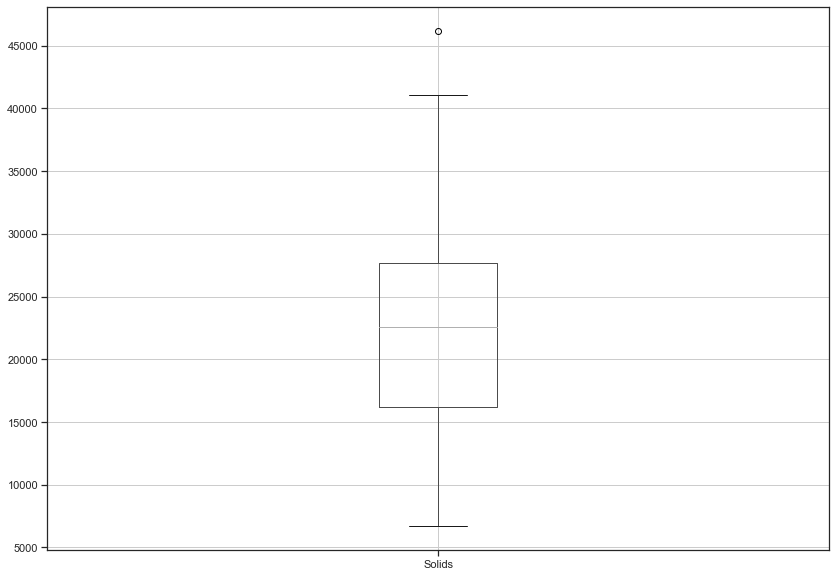

In [164]:
display(Markdown(
                    "**1. Menentukan hipotesis nol**\n\n"

                    "- $"
                    "H_{0}: \\mu_{Solids_{1,100}} = 21900"
                    "$\n\n"
                ))

display(Markdown(   
                    "**2. Pilih hipotesis alternatif**\n\n"

                    "Dengan menerapkan **two-tailed test** maka $H_{1}$ akan ditentukan sebagai berikut.\n\n"

                    "- $"
                    "H_{1}: \\mu_{Solids_{1,100}} \\neq 21900"
                    "$\n\n"
                ))


display(Markdown(   
                    "**3. Menentukan tingkat signifikan $\\alpha$**\n\n"

                    "- $"
                    "\\alpha = 0.05"
                    "$\n\n"
                ))

z_alpha = st.norm.ppf(1-.025)
display(Markdown(   
                    "**4. Menentukan uji statistik dan daerah kritis**\n\n"

                    "Dengan menguji terhadap **distribusi normal $z$**, didapat daerah-daerah kritis sebagai berikut.\n\n"

                    "- $"
                    "z > z_{0.025} = " + str(z_alpha) + "\\\\"
                    "z < -z_{0.025} = " + str(-z_alpha) + 
                    "$\n\n"
                ))


z_val = calc_mean_z(wp["Solids"].iloc[:100].mean(), 21900, wp["Solids"].iloc[:100].std(), 100)
display(Markdown(   
                    "**5. Menghitung nilai uji statistik**\n\n"

                    "- $"
                    "z = \\frac{\\bar{x} - \\mu_{0}}{\\sigma/\\sqrt{n}}\\\\"
                    "z = " + str(z_val) +
                    "$\n\n"

                    "Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di salah satu daerah kritis, yaitu\n\n"
                    "- $"
                    "z = " + str(z_val) + " > -z_{0.025} = " + str(-z_alpha) +
                    "$\n\n" 
                    
                    "maka $H_{0}$ gagal ditolak\n\n"
                ))

p_val = st.norm.sf(abs(z_val))
display(Markdown(
                    "**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**\n\n"

                    "- $"
                    "P(Z < " + str(z_val) +") = " + str(p_val) +
                    "$\n\n"

                    "Dengan turut mengevaluasi terhadap nilai-$P$, yaitu\n\n"
                    "- $"
                    "P(|Z| > "+str(abs(z_val))+") = 2P(Z < "+str(z_val)+") \\approx "+str(p_val*2)+" > \\alpha = 0.05"
                    "$\n\n" 
                    
                    "maka benar bahwa $H_{0}$ gagal ditolak sehingga nilai Rata-rata 100 baris pertama kolom Solids adalah 21900"
                ))

wp.iloc[:100].boxplot(["Solids"], figsize=(14,10))


#### 4d. Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

**1. Menentukan hipotesis nol**

- $H_{0}: P_{conductivity > 450} = 10\%$



**2. Pilih hipotesis alternatif**

Dengan menerapkan ***two-tailed test*** maka $H_{1}$ akan ditentukan sebagai berikut.

- $H_{1}: P_{conductivity > 450} \neq 10\%$



**3. Menentukan tingkat signifikan $\alpha$**

- $\alpha = 0.05$



**4. Menentukan uji statistik dan daerah kritis**

Dengan menguji terhadap **Binomial didekati normal**, didapat daerah-daerah kritis sebagai berikut.

- $z > z_{0.025} = 1.959963984540054\\z < -z_{0.025} = -1.959963984540054$



**5. Menghitung nilai uji statistik**

- $z = \frac{\hat{p} - p_{0}}{\sqrt{p_{0}q_{0}/n}}\\\\ \\\hat{p} = 0.3706467661691542\\p_{0} = 0.1\\q_{0} = 0.9\\ \\z = 40.44637613158932$

Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di salah satu daerah kritis, yaitu

- $z = 40.44637613158932 > z_{0.025} = 1.959963984540054$

maka $H_{0}$ ditolak



**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**

- $P(Z > 40.44637613158932) = 0.0$

Dengan turut mengevaluasi terhadap nilai-$P$, yaitu

- $P(|Z| > 40.44637613158932) = 2P(Z < 40.44637613158932) \approx 0.0 < \alpha = 0.05$

maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%

<AxesSubplot:>

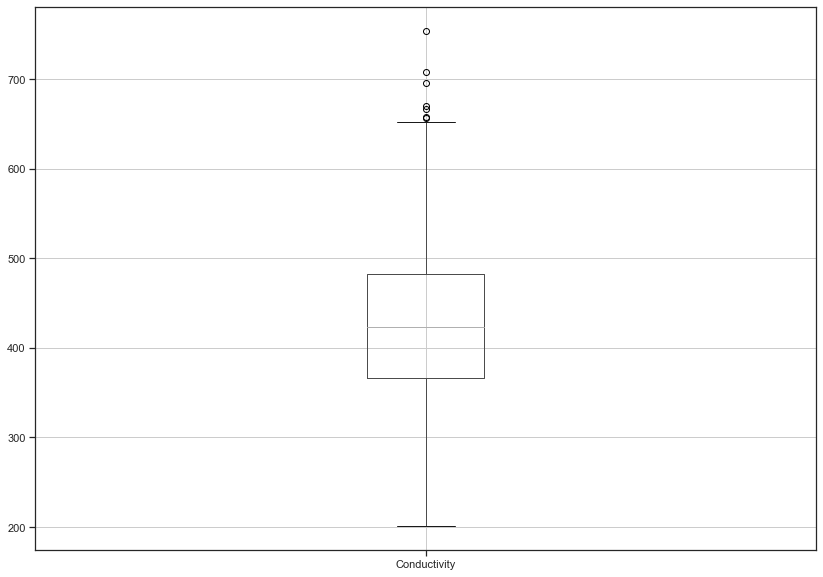

In [165]:
display(Markdown(
                    "**1. Menentukan hipotesis nol**\n\n"

                    "- $"
                    "H_{0}: P_{conductivity > 450} = 10\\%"
                    "$\n\n"
                ))

display(Markdown(   
                    "**2. Pilih hipotesis alternatif**\n\n"

                    "Dengan menerapkan ***two-tailed test*** maka $H_{1}$ akan ditentukan sebagai berikut.\n\n"

                    "- $"
                    "H_{1}: P_{conductivity > 450} \\neq 10\\%"
                    "$\n\n"
                ))


display(Markdown(   
                    "**3. Menentukan tingkat signifikan $\\alpha$**\n\n"

                    "- $"
                    "\\alpha = 0.05"
                    "$\n\n"
                ))

z_alpha = st.norm.ppf(1-.025)
display(Markdown(   
                    "**4. Menentukan uji statistik dan daerah kritis**\n\n"

                    "Dengan menguji terhadap **Binomial didekati normal**, didapat daerah-daerah kritis sebagai berikut.\n\n"

                    "- $"
                    "z > z_{0.025} = " + str(z_alpha) + "\\\\"
                    "z < -z_{0.025} = " + str(-z_alpha) + 
                    "$\n\n"
                ))

tot_obs_data = len(wp["Conductivity"].loc[wp["Conductivity"] > 450])
sample_prop = tot_obs_data / len(wp)
z_val = calc_bin_z(sample_prop, 0.1, len(wp))
display(Markdown(   
                    "**5. Menghitung nilai uji statistik**\n\n"

                    "- $"
                    "z = \\frac{\\hat{p} - p_{0}}{\\sqrt{p_{0}q_{0}/n}}\\\\"
                    "\\\\ \\\\"
                    "\\hat{p} = " + str(sample_prop) +
                    "\\\\"
                    "p_{0} = 0.1" 
                    "\\\\"
                    "q_{0} = 0.9"
                    "\\\\ \\\\"
                    "z = " + str(z_val) +
                    "$\n\n"

                    "Berdasarkan pengujian tersebut, karena nilai uji $z$ berada di salah satu daerah kritis, yaitu\n\n"
                    "- $"
                    "z = " + str(z_val) + " > z_{0.025} = " + str(z_alpha) +
                    "$\n\n" 
                    
                    "maka $H_{0}$ ditolak\n\n"
                ))

p_val = st.norm.sf(abs(z_val))
display(Markdown(
                    "**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**\n\n"

                    "- $"
                    "P(Z > " + str(z_val) +") = " + str(p_val) +
                    "$\n\n"

                    "Dengan turut mengevaluasi terhadap nilai-$P$, yaitu\n\n"
                    "- $"
                    "P(|Z| > "+str(abs(z_val))+") = 2P(Z < "+str(z_val)+") \\approx "+str(p_val*2)+" < \\alpha = 0.05"
                    "$\n\n" 
                    
                    "maka benar bahwa $H_{0}$ ditolak sehingga $H_{1}$ diterima, yakni Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%"
                ))

wp.boxplot(["Conductivity"], figsize = (14,10))


#### 4e. Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

**1. Menentukan hipotesis nol**

- $H_{0}: P_{Trihalomethanes < 450} = 5\%$



**2. Pilih hipotesis alternatif**

Dengan menerapkan ***one-tailed test*** maka $H_{1}$ akan ditentukan sebagai berikut.

- $H_{1}: P_{Trihalomethanes < 450} < 5\%$



**3. Menentukan tingkat signifikan $\alpha$**

- $\alpha = 0.05$



**4. Menentukan uji statistik dan daerah kritis**

Dengan menguji terhadap **Binomial didekati normal**, didapat daerah kritis sebagai berikut.

- $z < -z_{0.05} = -1.6448536269514722$



**5. Menghitung nilai uji statistik**

- $z = \frac{\hat{p} - p_{0}}{\sqrt{\frac{p_{0}q_{0}}{n}}}\\\\ \\\hat{p} = 0.0527363184079602\\p_{0} = 0.05\\q_{0} = 0.95\\ \\z = 0.5628826416670951$

Berdasarkan pengujian tersebut, karena nilai uji $z$ tidak berada di daerah kritis, yaitu

- $z = 0.5628826416670951 > z_{0.05} = -1.6448536269514722$

maka $H_{0}$ gagal ditolak



**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**

- $P(Z < 0.5628826416670951) = 0.286757400490763$

Dengan turut mengevaluasi terhadap nilai-$P$, yaitu

- $P(Z < 0.5628826416670951) = 0.286757400490763 > \alpha = 0.05$

maka benar bahwa $H_{0}$ gagal ditolak sehingga proporsi nilai Trihalomethanes yang kurang dari 40, adalah 5%

<AxesSubplot:>

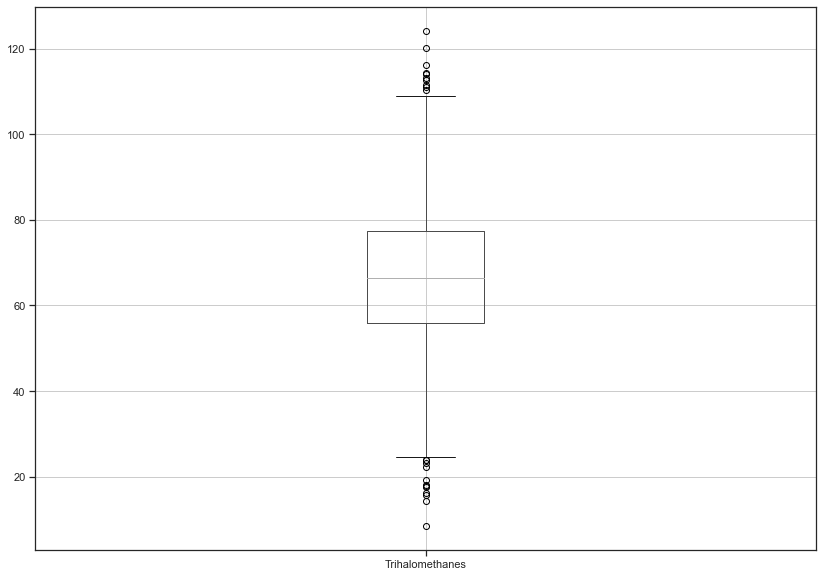

In [166]:
display(Markdown(
                    "**1. Menentukan hipotesis nol**\n\n"

                    "- $"
                    "H_{0}: P_{Trihalomethanes < 450} = 5\\%"
                    "$\n\n"
                ))

display(Markdown(   
                    "**2. Pilih hipotesis alternatif**\n\n"

                    "Dengan menerapkan ***one-tailed test*** maka $H_{1}$ akan ditentukan sebagai berikut.\n\n"

                    "- $"
                    "H_{1}: P_{Trihalomethanes < 450} < 5\\%"
                    "$\n\n"
                ))


display(Markdown(   
                    "**3. Menentukan tingkat signifikan $\\alpha$**\n\n"

                    "- $"
                    "\\alpha = 0.05"
                    "$\n\n"
                ))

z_alpha = st.norm.ppf(1-.05)
display(Markdown(   
                    "**4. Menentukan uji statistik dan daerah kritis**\n\n"

                    "Dengan menguji terhadap **Binomial didekati normal**, didapat daerah kritis sebagai berikut.\n\n"

                    "- $"
                    "z < -z_{0.05} = " + str(-z_alpha) + 
                    "$\n\n"
                ))

tot_obs_data = len(wp["Trihalomethanes"].loc[wp["Trihalomethanes"] < 40])
sample_prop = tot_obs_data / len(wp)
z_val = calc_bin_z(sample_prop, 0.05, len(wp))
display(Markdown(   
                    "**5. Menghitung nilai uji statistik**\n\n"

                    "- $"
                    "z = \\frac{\\hat{p} - p_{0}}{\\sqrt{\\frac{p_{0}q_{0}}{n}}}\\\\"
                    "\\\\ \\\\"
                    "\\hat{p} = " + str(sample_prop) +
                    "\\\\"
                    "p_{0} = 0.05" 
                    "\\\\"
                    "q_{0} = 0.95"
                    "\\\\ \\\\"
                    "z = " + str(z_val) +
                    "$\n\n"

                    "Berdasarkan pengujian tersebut, karena nilai uji $z$ tidak berada di daerah kritis, yaitu\n\n"
                    "- $"
                    "z = " + str(z_val) + " > z_{0.05} = " + str(-z_alpha) +
                    "$\n\n" 
                    
                    "maka $H_{0}$ gagal ditolak\n\n"
                ))

p_val = st.norm.sf(abs(z_val))
display(Markdown(
                    "**6. Menghitung nilai-$P$ berdasarkan uji statistik yang digunakan**\n\n"

                    "- $"
                    "P(Z < " + str(z_val) +") = " + str(p_val) +
                    "$\n\n"

                    "Dengan turut mengevaluasi terhadap nilai-$P$, yaitu\n\n"
                    "- $"
                    "P(Z < " + str(z_val) +") = " + str(p_val) + " > \\alpha = 0.05"
                    "$\n\n" 
                    
                    "maka benar bahwa $H_{0}$ gagal ditolak sehingga proporsi nilai Trihalomethanes yang kurang dari 40, adalah 5%"
                ))

wp.boxplot(["Trihalomethanes"], figsize = (14,10))




<AxesSubplot:>

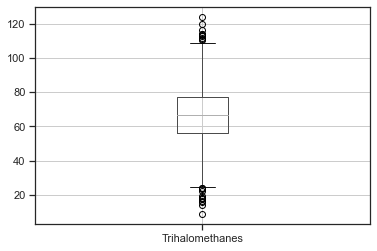

In [167]:
wp.boxplot("Trihalomethanes")

### **5. Melakukan test hipotesis 2 sampel, dengan menuliskan 6 langkah testing**
Boxplot juga ditampilkan untuk kolom/bagian yang bersesuaian.

In [168]:
# definisi fungsi z_score 2 sample
def z_score2(x1, x2, d0, var1, var2, n1, n2):
    return ((x1 - x2) - d0) / (((var1 / n1) + (var2 / n2))**0.5)

#### 5a. Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

Misal bagian awal = 1 dan bagian akhir = 2

**1. Menentukan hipotesis nol**



$
H_0 : \mu_1 - \mu_2 = 0$

**2. Pilih hipotesis alternatif**



$
H_1 : \mu_1 - \mu_2 \neq 0$

**3. Menentukan tingkat signifikan $\alpha$**

$
\alpha = 0.05$

**4. Menentukan uji statistik dan daerah kritis**



Uji test kali ini menggunakan **Z-Test** dengan tipe *two-tailed test*. Daerah kritis: $z < -1.96$ atau $z > 1.96$

**5. Menghitung nilai uji statistik**



$\bar{X}_1 = 331.30532950549565$

$\bar{X}_2 = 335.11742332488245$

$S^2_1 = 1708.3966020772502$

$S^2_2 = 1682.7330644425087$

$n_1 = 1005,n_2 = 1005$

$
z = \frac{(\bar{x}_1 - \bar{x}_2)-d_0}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_1}}$

dengan $d_0 = \mu_1 - \mu_2 = 0$

didapat $z = -2.0752690696871983$ sehingga $P = P(|Z| > 2.0752690696871983) = 2P(Z < -2.0752690696871983) \approx 0.0376 < \alpha = 0.05$

**6. Kesimpulan**



**$H_0$ DITOLAK** karena P-value yang didapat lebih kecil dari $\alpha$ ($z$ hasil perhitungan terletak di salah satu daerah kritis, yaitu $z < -1.96$

Rata-rata kedua bagian tersebut berbeda.

<AxesSubplot:ylabel='Sulfate'>

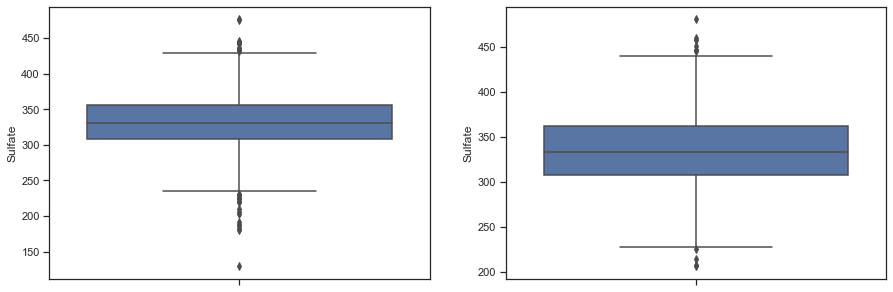

In [169]:
n1 = wp['Sulfate'].count() // 2
n2 = wp['Sulfate'].count() - n1

sulfate_awal = wp.iloc[:n1,:]
sulfate_akhir = wp.iloc[n2:,:]

display(Markdown("Misal bagian awal = 1 dan bagian akhir = 2"))
display(Markdown("**1. Menentukan hipotesis nol**\n\n"))
display(Markdown("$\nH_0 : \\mu_1 - \\mu_2 = 0$"))

display(Markdown("**2. Pilih hipotesis alternatif**\n\n"))
display(Markdown("$\nH_1 : \\mu_1 - \\mu_2 \\neq 0$"))

display(Markdown("**3. Menentukan tingkat signifikan $\\alpha$**\n\n$\n\\alpha = 0.05$"))

display(Markdown("**4. Menentukan uji statistik dan daerah kritis**\n\n"))
display(Markdown("Uji test kali ini menggunakan **Z-Test** dengan tipe *two-tailed test*. Daerah kritis: $z < -1.96$ atau $z > 1.96$"))

display(Markdown("**5. Menghitung nilai uji statistik**\n\n"))
xbar1, xbar2 = sulfate_awal['Sulfate'].mean(), sulfate_akhir['Sulfate'].mean()
var1, var2 = sulfate_awal['Sulfate'].var(), sulfate_akhir['Sulfate'].var()

display(Markdown("$\\bar{X}_1 = "+ str(xbar1) +"$"))
display(Markdown("$\\bar{X}_2 = " + str(xbar2) +"$"))
display(Markdown("$S^2_1 = "+ str(var1) +"$"))
display(Markdown("$S^2_2 = " + str(var2) +"$"))
display(Markdown("$n_1 = "+ str(n1) +",n_2 = "+ str(n2) +"$"))
display(Markdown("$\nz = \\frac{(\\bar{x}_1 - \\bar{x}_2)-d_0}{\\sqrt{\\sigma^2_1/n_1 + \\sigma^2_2/n_1}}$"))
display(Markdown("dengan $d_0 = \\mu_1 - \\mu_2 = 0$"))

z = z_score2(xbar1, xbar2, 0, var1, var2, n1, n2)

display(Markdown("didapat $z = "+str(z)+"$ sehingga $P = P(|Z| > "+str(abs(z))+") = 2P(Z < "+str(z)+") \\approx "+str(0.0188*2)+" < \\alpha = 0.05$"))

display(Markdown("**6. Kesimpulan**\n\n"))
display(Markdown("**$H_0$ DITOLAK** karena P-value yang didapat lebih kecil dari $\\alpha$ ($z$ hasil perhitungan terletak di salah satu daerah kritis, yaitu $z < -1.96$\n\nRata-rata kedua bagian tersebut berbeda."))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=sulfate_awal, y="Sulfate", ax=axs[0])
sns.boxplot(data=sulfate_akhir, y="Sulfate", ax=axs[1])

#### 5b. Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.15?

Misal bagian awal = 1 dan bagian akhir = 2

**1. Menentukan hipotesis nol**



$
H_0 : \mu_1 - \mu_2 = 0.15$

**2. Pilih hipotesis alternatif**



$
H_1 : \mu_1 - \mu_2 > 0.15$

**3. Menentukan tingkat signifikan $\alpha$**

$\alpha = 0.05$

**4. Menentukan uji statistik dan daerah kritis**



Uji test kali ini menggunakan **Z-Test** dengan tipe *one-tailed test*. Daerah kritis: $z > 1.6449$

**5. Menghitung nilai uji statistik**



$\bar{X}_1 = 14.253972723723393$

$\bar{X}_2 = 14.461907080372756$

$S^2_1 = 11.230287224380323$

$S^2_2 = 10.880581782847479$

$
z = \frac{(\bar{x}_1 - \bar{x}_2)-d_0}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_1}}$

dengan $d_0 = \mu_1 - \mu_2 = 0.15$

didapat $z = -2.413145517798807$ sehingga $P = P(Z > -2.413145517798807) = 0.9920 > \alpha = 0.05$

**6. Kesimpulan**



**$H_0$ TIDAK DITOLAK** karena P-value yang didapat lebih besar dari $\alpha$ ($z$ hasil perhitungan terletak di luar daerah kritis $z > 1.6449$

Kemungkinan besar rata-rata kedua bagian tersebut sama.

<AxesSubplot:ylabel='OrganicCarbon'>

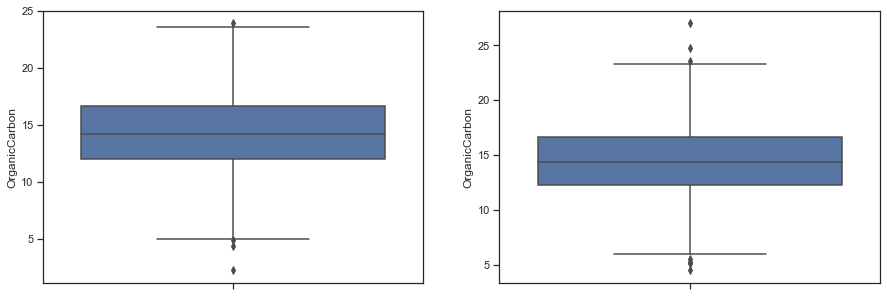

In [170]:
n1 = wp['OrganicCarbon'].count() // 2
n2 = wp['OrganicCarbon'].count() - n1

oc_awal = wp.iloc[:n1,:]
oc_akhir = wp.iloc[n2:,:]

display(Markdown("Misal bagian awal = 1 dan bagian akhir = 2"))
display(Markdown("**1. Menentukan hipotesis nol**\n\n"))
display(Markdown("$\nH_0 : \\mu_1 - \\mu_2 = 0.15$"))

display(Markdown("**2. Pilih hipotesis alternatif**\n\n"))
display(Markdown("$\nH_1 : \\mu_1 - \\mu_2 > 0.15$"))

display(Markdown("**3. Menentukan tingkat signifikan $\\alpha$**\n\n$\\alpha = 0.05$"))

display(Markdown("**4. Menentukan uji statistik dan daerah kritis**\n\n"))
display(Markdown("Uji test kali ini menggunakan **Z-Test** dengan tipe *one-tailed test*. Daerah kritis: $z > 1.6449$"))

display(Markdown("**5. Menghitung nilai uji statistik**\n\n"))
xbar1, xbar2 = oc_awal['OrganicCarbon'].mean(), oc_akhir['OrganicCarbon'].mean()
var1, var2 = oc_awal['OrganicCarbon'].var(), oc_akhir['OrganicCarbon'].var()

display(Markdown("$\\bar{X}_1 = "+ str(xbar1) +"$"))
display(Markdown("$\\bar{X}_2 = " + str(xbar2) +"$"))
display(Markdown("$S^2_1 = "+ str(var1) +"$"))
display(Markdown("$S^2_2 = " + str(var2) +"$"))
display(Markdown("$\nz = \\frac{(\\bar{x}_1 - \\bar{x}_2)-d_0}{\\sqrt{\\sigma^2_1/n_1 + \\sigma^2_2/n_1}}$"))
display(Markdown("dengan $d_0 = \\mu_1 - \\mu_2 = 0.15$"))

z = z_score2(xbar1, xbar2, 0.15, var1, var2, n1, n2)

display(Markdown("didapat $z = "+str(z)+"$ sehingga $P = P(Z > "+str(z)+") = 0.9920 > \\alpha = 0.05$"))

display(Markdown("**6. Kesimpulan**\n\n"))
display(Markdown("**$H_0$ TIDAK DITOLAK** karena P-value yang didapat lebih besar dari $\\alpha$ ($z$ hasil perhitungan terletak di luar daerah kritis $z > 1.6449$\n\nKemungkinan besar rata-rata kedua bagian tersebut sama."))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=oc_awal, y="OrganicCarbon", ax=axs[0])
sns.boxplot(data=oc_akhir, y="OrganicCarbon", ax=axs[1])

#### 5c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

Misal bagian awal = 1 dan bagian akhir = 2

**1. Menentukan hipotesis nol**



$
H_0 : \mu_1 - \mu_2 = 0$

**2. Pilih hipotesis alternatif**



$
H_1 : \mu_1 - \mu_2 \neq 0$

**3. Menentukan tingkat signifikan $\alpha$**

$\alpha = 0.05$

**4. Menentukan uji statistik dan daerah kritis**



Uji test kali ini menggunakan **Z-Test** dengan tipe *two-tailed test*. Daerah kritis: $z < -1.96$ atau $z > 1.96$

**5. Menghitung nilai uji statistik**



$\bar{X}_1 = 7.007771140423921$

$\bar{X}_2 = 7.147197636249925$

$S^2_1 = 1.7077427735538262$

$S^2_2 = 1.7077427735538262$

$n_1 = 100,n_2 = 100$

$
z = \frac{(\bar{x}_1 - \bar{x}_2)-d_0}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_1}}$

dengan $d_0 = \mu_1 - \mu_2 = 0$

didapat $z = -0.7544302374237427$ sehingga $P = P(|Z| > 0.7544302374237427) = 2P(Z < -0.7544302374237427) \approx 0.4532 > \alpha = 0.05$

**6. Kesimpulan**



**$H_0$ TIDAK DITOLAK** karena P-value yang didapat lebih besar dari $\alpha$ ($z$ hasil perhitungan terletak di luar daerah kritis $z < -1.96$ atau $z > 1.96$

 Kemungkinan besar rata-rata kedua bagian tersebut sama.

<AxesSubplot:ylabel='Chloramines'>

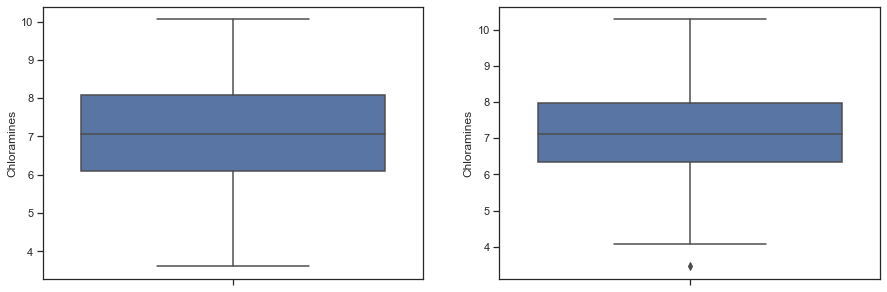

In [171]:
chloramines_awal = wp.iloc[:100,:]
chloramines_akhir = wp.iloc[-100:,:]

n1 = 100
n2 = 100

display(Markdown("Misal bagian awal = 1 dan bagian akhir = 2"))
display(Markdown("**1. Menentukan hipotesis nol**\n\n"))
display(Markdown("$\nH_0 : \\mu_1 - \\mu_2 = 0$"))

display(Markdown("**2. Pilih hipotesis alternatif**\n\n"))
display(Markdown("$\nH_1 : \\mu_1 - \\mu_2 \\neq 0$"))

display(Markdown("**3. Menentukan tingkat signifikan $\\alpha$**\n\n$\\alpha = 0.05$"))

display(Markdown("**4. Menentukan uji statistik dan daerah kritis**\n\n"))
display(Markdown("Uji test kali ini menggunakan **Z-Test** dengan tipe *two-tailed test*. Daerah kritis: $z < -1.96$ atau $z > 1.96$"))

display(Markdown("**5. Menghitung nilai uji statistik**\n\n"))
xbar1, xbar2 = chloramines_awal['Chloramines'].mean(), chloramines_akhir['Chloramines'].mean()
var1, var2 = chloramines_akhir['Chloramines'].var(), chloramines_akhir['Chloramines'].var()

display(Markdown("$\\bar{X}_1 = "+ str(xbar1) +"$"))
display(Markdown("$\\bar{X}_2 = " + str(xbar2) +"$"))
display(Markdown("$S^2_1 = "+ str(var1) +"$"))
display(Markdown("$S^2_2 = " + str(var2) +"$"))
display(Markdown("$n_1 = "+ str(n1) +",n_2 = "+ str(n2) +"$"))
display(Markdown("$\nz = \\frac{(\\bar{x}_1 - \\bar{x}_2)-d_0}{\\sqrt{\\sigma^2_1/n_1 + \\sigma^2_2/n_1}}$"))
display(Markdown("dengan $d_0 = \\mu_1 - \\mu_2 = 0$"))

z = z_score2(xbar1, xbar2, 0, var1, var2, n1, n2)

display(Markdown("didapat $z = "+str(z)+"$ sehingga $P = P(|Z| > "+str(abs(z))+") = 2P(Z < "+str(z)+") \\approx "+str(0.2266*2)+" > \\alpha = 0.05$"))

display(Markdown("**6. Kesimpulan**\n\n"))
display(Markdown("**$H_0$ TIDAK DITOLAK** karena P-value yang didapat lebih besar dari $\\alpha$ ($z$ hasil perhitungan terletak di luar daerah kritis $z < -1.96$ atau $z > 1.96$\n\n Kemungkinan besar rata-rata kedua bagian tersebut sama."))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=chloramines_awal, y="Chloramines", ax=axs[0])
sns.boxplot(data=chloramines_akhir, y="Chloramines", ax=axs[1])

#### 5d. Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity?

Misal bagian awal = 1 dan bagian akhir = 2

**1. Menentukan hipotesis nol**



$
H_0 : P(X_1 > 4) = P(X_2 > 4)$

**2. Pilih hipotesis alternatif**



$
H_1 : P(X_1 > 4) > P(X_2 > 4)$

**3. Menentukan tingkat signifikan $\alpha$**

$\alpha = 0.05$

**4. Menentukan uji statistik dan daerah kritis**



Uji test kali ini menggunakan **Z Test** dengan tipe tes *one-tailed test*. Daerah kritis: $z > 1.6449$

**5. Menghitung nilai uji statistik**



$n_1 = 1005,n_2 = 1005$

$
\hat{p}_1 = \frac{x_1}{n_1} = 0.4835820895522388$

$
\hat{p}_2 = \frac{x_2}{n_2} = 0.48656716417910445$

$
\hat{p} = \frac{x_1 + x_2}{n_1 + n_2} = 0.48507462686567165$

$
z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\bar{p}(1-\bar{p})(\frac{1}{n_1} + \frac{1}{n_2})}}$

didapat $z = -0.13388958661778735$ sehingga $P = P(Z > -0.13388958661778735) = 0.5517 > \alpha = 0.05$

**6. Kesimpulan**



**$H_0$ TIDAK DITOLAK** karena P-value yang didapat lebih besar dari $\alpha$ ($z$ hasil perhitungan terletak di luar daerah kritis $z > 1.6449$

 Kemungkinan besar proporsi nilai bagian awal sama dengan bagian akhir.

<AxesSubplot:ylabel='Turbidity'>

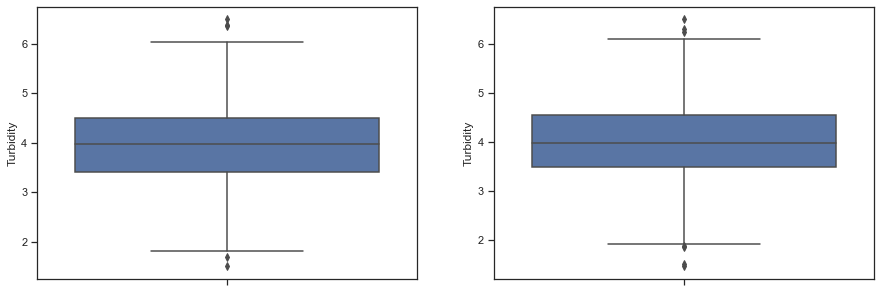

In [172]:
n1 = wp['Turbidity'].count() // 2
n2 = wp['Turbidity'].count() - n1

turbidity_awal = wp.iloc[:n1,:]
turbidity_akhir = wp.iloc[n2:,:]

display(Markdown("Misal bagian awal = 1 dan bagian akhir = 2"))
display(Markdown("**1. Menentukan hipotesis nol**\n\n"))
display(Markdown("$\nH_0 : P(X_1 > 4) = P(X_2 > 4)$"))

display(Markdown("**2. Pilih hipotesis alternatif**\n\n"))
display(Markdown("$\nH_1 : P(X_1 > 4) > P(X_2 > 4)$"))

display(Markdown("**3. Menentukan tingkat signifikan $\\alpha$**\n\n$\\alpha = 0.05$"))

display(Markdown("**4. Menentukan uji statistik dan daerah kritis**\n\n"))
display(Markdown("Uji test kali ini menggunakan **Z Test** dengan tipe tes *one-tailed test*. Daerah kritis: $z > 1.6449$"))

display(Markdown("**5. Menghitung nilai uji statistik**\n\n"))
x1, x2 = 0, 0
for item in turbidity_awal["Turbidity"]:
    if (item > 4):
        x1 += 1
for item in turbidity_akhir["Turbidity"]:
    if (item > 4):
        x2 += 1

phat1, phat2 = x1 / n1, x2 / n1
phat = (x1 + x2) / (n1 + n2)

display(Markdown("$n_1 = "+ str(n1) +",n_2 = "+ str(n2) +"$"))
display(Markdown("$\n\\hat{p}_1 = \\frac{x_1}{n_1} = " + str(phat1) +"$"))
display(Markdown("$\n\\hat{p}_2 = \\frac{x_2}{n_2} = " + str(phat2) +"$"))
display(Markdown("$\n\\hat{p} = \\frac{x_1 + x_2}{n_1 + n_2} = " + str(phat) +"$"))
display(Markdown("$\nz = \\frac{\\hat{p}_1 - \\hat{p}_2}{\\sqrt{\\bar{p}(1-\\bar{p})(\\frac{1}{n_1} + \\frac{1}{n_2})}}$"))

# alternate z_score function

z = (phat1-phat2)/(phat*(1-phat)*((1/n1)+(1/n2)))**0.5
display(Markdown("didapat $z = "+str(z)+"$ sehingga $P = P(Z > "+str(z)+") = 0.5517 > \\alpha = 0.05$"))

display(Markdown("**6. Kesimpulan**\n\n"))
display(Markdown("**$H_0$ TIDAK DITOLAK** karena P-value yang didapat lebih besar dari $\\alpha$ ($z$ hasil perhitungan terletak di luar daerah kritis $z > 1.6449$\n\n Kemungkinan besar proporsi nilai bagian awal sama dengan bagian akhir."))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=turbidity_awal, y="Turbidity", ax=axs[0])
sns.boxplot(data=turbidity_akhir, y="Turbidity", ax=axs[1])

#### 5e. Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

Misal bagian awal = 1 dan bagian akhir = 2

**1. Menentukan hipotesis nol**



$
H_0 : \sigma^2_1 - \sigma^2_2 = 0$

**2. Pilih hipotesis alternatif**



$
H_1 : \sigma^2_1 - \sigma^2_2 \neq 0$ (Tipe tes: *two-tailed test)*

**3. Menentukan tingkat signifikan $\alpha$**

$\alpha = 0.05$

**4. Menentukan uji statistik dan daerah kritis**



Uji test kali ini menggunakan uji **Distribusi F**. Diasumsikan kolom *Sulfate* berdistribusi normal dengan derajat kebebasan:


$v_1 = n_1 - 1 = 1004, v_1 = n_1 - 1 = 1004$

Dengan nilai derajat kebebasan tersebut, daerah kritis didapat dengan nilai $f < 0.90152732$ atau $f > 1.10922872$

**5. Menghitung nilai uji statistik**



$s^2_1 = 1708.3966020772502$

$s^2_2 = 1682.7330644425087$

$n_1 = 1005,n_2 = 1005$

$
f = \frac{s^2_1}{s^2_2}$

didapat $f =1.0152511043950063$

**6. Kesimpulan**



**$H_0$ TIDAK DITOLAK** karena nilai $t$ yang didapat **tidak terletak** di daerah kritis, melainkan terletak di $0.90152732 \le f \le 1.10922872 $

 Kemungkinan besar variansi bagian awal sama dengan bagian akhir.

<AxesSubplot:ylabel='Sulfate'>

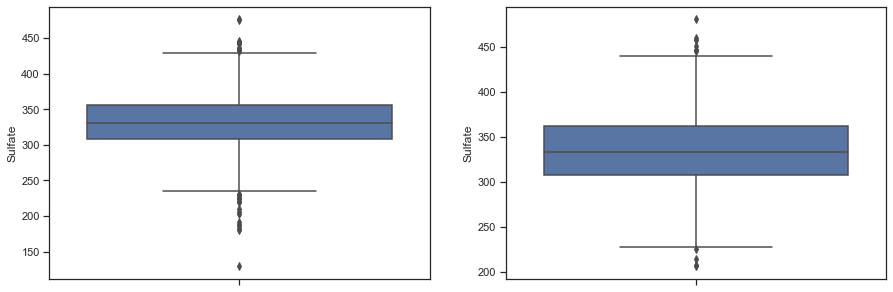

In [173]:
n1 = wp['Sulfate'].count() // 2
n2 = wp['Sulfate'].count() - n1

sulfate_awal = wp.iloc[:n1,:]
sulfate_akhir = wp.iloc[n2:,:]

display(Markdown("Misal bagian awal = 1 dan bagian akhir = 2"))
display(Markdown("**1. Menentukan hipotesis nol**\n\n"))
display(Markdown("$\nH_0 : \\sigma^2_1 - \\sigma^2_2 = 0$"))

display(Markdown("**2. Pilih hipotesis alternatif**\n\n"))
display(Markdown("$\nH_1 : \\sigma^2_1 - \\sigma^2_2 \\neq 0$ (Tipe tes: *two-tailed test)*"))

display(Markdown("**3. Menentukan tingkat signifikan $\\alpha$**\n\n$\\alpha = 0.05$"))

display(Markdown("**4. Menentukan uji statistik dan daerah kritis**\n\n"))
display(Markdown("Uji test kali ini menggunakan uji **Distribusi F**. Diasumsikan kolom *Sulfate* berdistribusi normal dengan derajat kebebasan:"))
v1, v2 = (n1 - 1), (n2 - 1)
display(Markdown("\n$v_1 = n_1 - 1 = "+str(v1)+", v_1 = n_1 - 1 = "+str(v2)+"$"))

display(Markdown("Dengan nilai derajat kebebasan tersebut, daerah kritis didapat dengan nilai $f < 0.90152732$ atau $f > 1.10922872$"))

display(Markdown("**5. Menghitung nilai uji statistik**\n\n"))
s12 = sulfate_awal['Sulfate'].var()
s22 = sulfate_akhir['Sulfate'].var()

display(Markdown("$s^2_1 = "+ str(s12) +  "$"))
display(Markdown("$s^2_2 = "+ str(s22) +  "$"))
display(Markdown("$n_1 = "+ str(n1) +",n_2 = "+ str(n2) +"$"))
display(Markdown("$\nf = \\frac{s^2_1}{s^2_2}$"))

f = s12 / s22

display(Markdown("didapat $f =" + str(f) + "$"))
display(Markdown("**6. Kesimpulan**\n\n"))
display(Markdown("**$H_0$ TIDAK DITOLAK** karena nilai $t$ yang didapat **tidak terletak** di daerah kritis, melainkan terletak di $0.90152732 \\le f \\le 1.10922872 $\n\n Kemungkinan besar variansi bagian awal sama dengan bagian akhir."))

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=sulfate_awal, y="Sulfate", ax=axs[0])
sns.boxplot(data=sulfate_akhir, y="Sulfate", ax=axs[1])

### 6. **Test korelasi**
Tentukan apakah setiap kolom non-target berkorelasi dengan kolom target, dengan menggambarkan juga scatter plot nya. Gunakan correlation test. 
Nilai koefisien korelasi terletak di pada rentang antara -1 dan 1, dengan rincian sebagai berikut:
- $-1$ menunjukkan korelasi $X$ dan $Y$ negatif yang kuat. setiap kali $X$ meningkat, $Y$ berkurang.
- $0$ berarti tidak ada hubungan antara $X$ dan $Y$.
- $1$ menunjukkan korelasi $X$ dan $Y$ positif yang kuat. setiap kali $X$ meningkat, $Y$ meningkat.

Skala korelasi sebagai acuan:
- 0 - 0,01: **Tidak ada** korelasi antara dua variabel
- 0,01 – 0,25: Korelasi sangat **lemah**
- 0,25 – 0,5: Korelasi **cukup**
- 0,5 – 0,75: Korelasi  **kuat**
- 0,75 – 0,99: Korelasi  **sangat kuat**
- 1: Korelasi **sempurna**

In [174]:
# fungsi untuk menuliskan hasil korelasi
def corr_result(rho, x, y):
    out = "Dari hasil $\\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom "+ x +" dan "+ y
    if (rho > -0.01 and rho < 0.01): out += " **tidak** berkorelasi"
    else:
        if (rho > 0): out += " berkorelasi **positif** "
        else: out += " berkorelasi **negatif** "

        out += " dan memiliki tingkat korelasi "
        if (rho >= 0.01 and rho <= 0.25) or (rho <= -0.01 and rho >= -0.25): out += "**sangat lemah**"
        elif (rho > 0.25 and rho <= 0.5) or (rho < -0.25 and rho >= -0.5): out += "**cukup**"
        elif (rho > 0.5 and rho <= 0.75) or (rho < -0.5 and rho >= -0.75): out += "**kuat**"
        elif (rho > 0.75 and rho < 1) or (rho < -0.75 and rho > -1): out += "**sangat kuat**"
        else: out += "**sempurna**"
    display(Markdown(out))

#### pH

Hasil korelasi kolom pH (non-target) dengan kolom Potability (target)

$\rho_{pH,Potability} = 0.01547509440843348$

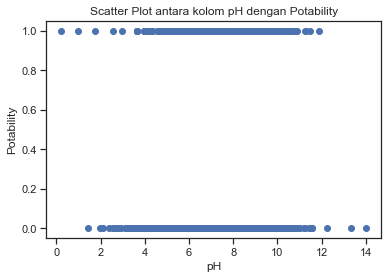

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom pH dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [175]:
display(Markdown("#### pH"))
display(Markdown("Hasil korelasi kolom pH (non-target) dengan kolom Potability (target)"))
rho = wp['pH'].corr(wp['Potability'])
display(Markdown("$\\rho_{pH,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom pH dengan Potability")
plt.scatter(x=wp['pH'],y=wp['Potability'])
plt.xlabel("pH")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "pH", "Potability")

#### Hardness

Hasil korelasi kolom Hardness (non-target) dengan kolom Potability (target)

$\rho_{Hardness,Potability} = -0.0014631528959479344$

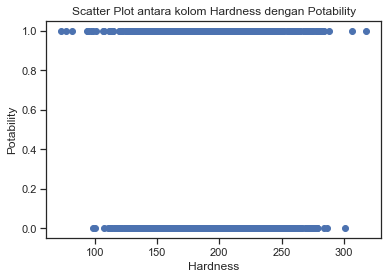

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Hardness dan Potability **tidak** berkorelasi

In [176]:
display(Markdown("#### Hardness"))
display(Markdown("Hasil korelasi kolom Hardness (non-target) dengan kolom Potability (target)"))
rho = wp['Hardness'].corr(wp['Potability'])
display(Markdown("$\\rho_{Hardness,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Hardness dengan Potability")
plt.scatter(x=wp['Hardness'],y=wp['Potability'])
plt.xlabel("Hardness")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Hardness", "Potability")

#### Solids

Hasil korelasi kolom Solids (non-target) dengan kolom Potability (target)

$\rho_{Solids,Potability} = 0.03897657818173466$

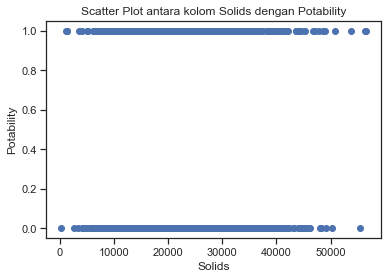

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Solids dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [177]:
display(Markdown("#### Solids"))
display(Markdown("Hasil korelasi kolom Solids (non-target) dengan kolom Potability (target)"))
rho = wp['Solids'].corr(wp['Potability'])
display(Markdown("$\\rho_{Solids,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Solids dengan Potability")
plt.scatter(x=wp['Solids'],y=wp['Potability'])
plt.xlabel("Solids")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Solids", "Potability")

#### Chloramines

Hasil korelasi kolom Chloramines (non-target) dengan kolom Potability (target)

$\rho_{Chloramines,Potability} = 0.02077892184052409$

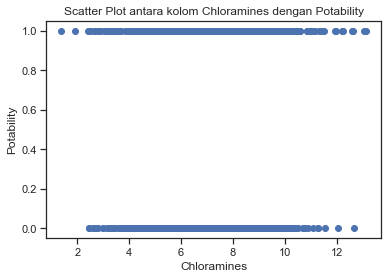

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Chloramines dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [178]:
display(Markdown("#### Chloramines"))
display(Markdown("Hasil korelasi kolom Chloramines (non-target) dengan kolom Potability (target)"))
rho = wp['Chloramines'].corr(wp['Potability'])
display(Markdown("$\\rho_{Chloramines,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Chloramines dengan Potability")
plt.scatter(x=wp['Chloramines'],y=wp['Potability'])
plt.xlabel("Chloramines")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Chloramines", "Potability")

#### Sulfate

Hasil korelasi kolom Sulfate (non-target) dengan kolom Potability (target)

$\rho_{Sulfate,Potability} = -0.015703164419273778$

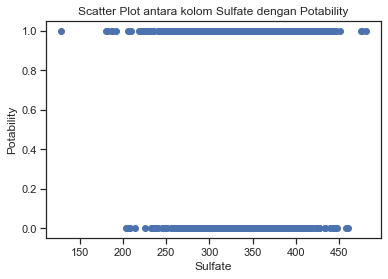

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Sulfate dan Potability berkorelasi **negatif**  dan memiliki tingkat korelasi **sangat lemah**

In [179]:
display(Markdown("#### Sulfate"))
display(Markdown("Hasil korelasi kolom Sulfate (non-target) dengan kolom Potability (target)"))
rho = wp['Sulfate'].corr(wp['Potability'])
display(Markdown("$\\rho_{Sulfate,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Sulfate dengan Potability")
plt.scatter(x=wp['Sulfate'],y=wp['Potability'])
plt.xlabel("Sulfate")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Sulfate", "Potability")

#### Conductivity

Hasil korelasi kolom Conductivity (non-target) dengan kolom Potability (target)

$\rho_{Conductivity,Potability} = -0.016257120111377067$

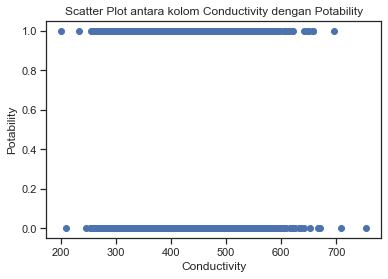

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Conductivity dan Potability berkorelasi **negatif**  dan memiliki tingkat korelasi **sangat lemah**

In [180]:
display(Markdown("#### Conductivity"))
display(Markdown("Hasil korelasi kolom Conductivity (non-target) dengan kolom Potability (target)"))
rho = wp['Conductivity'].corr(wp['Potability'])
display(Markdown("$\\rho_{Conductivity,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Conductivity dengan Potability")
plt.scatter(x=wp['Conductivity'],y=wp['Potability'])
plt.xlabel("Conductivity")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Conductivity", "Potability")

#### OrganicCarbon

Hasil korelasi kolom OrganicCarbon (non-target) dengan kolom Potability (target)

$\rho_{OrganicCarbon,Potability} = -0.015488461910747259$

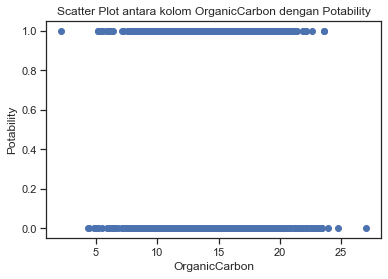

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom OrganicCarbon dan Potability berkorelasi **negatif**  dan memiliki tingkat korelasi **sangat lemah**

In [181]:
display(Markdown("#### OrganicCarbon"))
display(Markdown("Hasil korelasi kolom OrganicCarbon (non-target) dengan kolom Potability (target)"))
rho = wp['OrganicCarbon'].corr(wp['Potability'])
display(Markdown("$\\rho_{OrganicCarbon,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom OrganicCarbon dengan Potability")
plt.scatter(x=wp['OrganicCarbon'],y=wp['Potability'])
plt.xlabel("OrganicCarbon")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "OrganicCarbon", "Potability")

#### Trihalomethanes

Hasil korelasi kolom Trihalomethanes (non-target) dengan kolom Potability (target)

$\rho_{Trihalomethanes,Potability} = 0.009236711064712997$

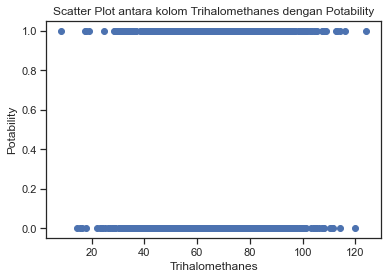

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Trihalomethanes dan Potability **tidak** berkorelasi

In [182]:
display(Markdown("#### Trihalomethanes"))
display(Markdown("Hasil korelasi kolom Trihalomethanes (non-target) dengan kolom Potability (target)"))
rho = wp['Trihalomethanes'].corr(wp['Potability'])
display(Markdown("$\\rho_{Trihalomethanes,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Trihalomethanes dengan Potability")
plt.scatter(x=wp['Trihalomethanes'],y=wp['Potability'])
plt.xlabel("Trihalomethanes")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Trihalomethanes", "Potability")

#### Turbidity

Hasil korelasi kolom Turbidity (non-target) dengan kolom Potability (target)

$\rho_{Turbidity,Potability} = 0.022331042640622665$

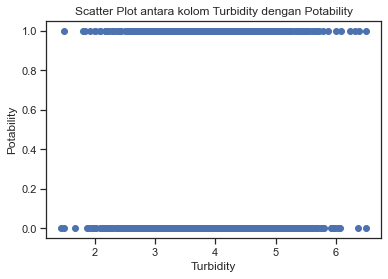

Dari hasil $\rho$ yang didapatkan, dapat disimpulkan bahwa bahwa kolom Turbidity dan Potability berkorelasi **positif**  dan memiliki tingkat korelasi **sangat lemah**

In [183]:
display(Markdown("#### Turbidity"))
display(Markdown("Hasil korelasi kolom Turbidity (non-target) dengan kolom Potability (target)"))
rho = wp['Turbidity'].corr(wp['Potability'])
display(Markdown("$\\rho_{Turbidity,Potability} = "+str(rho)+"$"))
plt.title("Scatter Plot antara kolom Turbidity dengan Potability")
plt.scatter(x=wp['Turbidity'],y=wp['Potability'])
plt.xlabel("Turbidity")
plt.ylabel("Potability")
plt.show()
corr_result(rho, "Turbidity", "Potability")